<a href="https://colab.research.google.com/github/MinGyeongdo/Sesion2_projcet/blob/main/Predict_grosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 해결 주제
### 최근 2년이내에 개봉한 영화의 지금까지 통계결과에 의한 총 매출 예측하기.
> 제작한 영화의 앞으로의 수요를 예측하는 것은 경제적인 측면에서 매우 중요한 일입니다.<br> 앞으로 얼마나 팔릴까? 라는 질문은 여러부분에서 중요하게 사용됩니다.<br>

- 첫째, 영화 상영관의 배정<br>
당연하게 많이 보고 매출이 많이 나올 것 같은 영화는 많은 관객을 수용하기 위해 많은 상영관과 시간을 배정해야합니다. 반대로 매출이 별로 나오지 않는 영화 같은 경우에는 상영관을 축소시켜 기업입장에서 최대한 효율적인 방향으로 비용을 사용해야 합니다.<br><br>

- 둘째, 매출을 통한 마케팅 전략 수립<br>
 만들 모델의 한계점이기도 하지만, 이 모델의 인사이트를 통해 다양한 마케팅 전략을 수립할 수 있습니다. 영화의 인기도에 미치는 Feature는 굉장히 많습니다. 최근에 개봉한 탑건 같은 경우는 어쩌면 '톰 크루즈'라는 배우의 영향력에 힘입어 흥행한 것일 수도 있습니다. 그리고 '크리스토퍼 놀란'이라는 감독은 워낙 영화계에 지대한 영향력을 비치기에 어떤영화를 만들든 장르를 불문하고 보는 사람들도 있습니다. 하지만 반대로 말하면, 매출 예측을 통해 주요 인기 원인과 홍보 전략을 세울 수 있습니다. 예를 들어 '다크 나이트'라는 영화가 생각보다 부진한 성적을 보인다고 가정하면, '크리스토퍼 놀란제작' 이라는 키워드를 내세워 적극적으로 홍보에 사용 할 수 있습니다.<br><bv>

- 셋째, 영화 마케팅의 확장
히로인 영화나, 귀여운 캐릭터가 등장하는 영화, 애니메이션 등등의 경우에도 매출에 따라 인기를 파악할 수 있으므로 굿즈 제작이나, 여러 먹을거리에 대한 프로모션 등등 다양한 방면으로 활용될 가능성이 있습니다.<br>

이 처럼 수요를 예측하여 여기에 맞는 비용을 산정하는 일은 매우 중요한 일이고 기업의 이윤을 추구하는 데 있어서 경제적인 일입니다.

그러나 아래에서 사용하는 데이터 셋들의 feature로 정확한 매출을 산정하는 것은 힘든일이기 때문에 영화제 수상 여부, 나라별 매출 등등의 요소들을 추가하여 개선해야할 필요가 있습니다.




In [165]:
  !pip install category_encoders
  !pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 47.5 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=78400db8323e328c5033e6c41eb4c869428dc028a40136058482a9a2fba30ed3
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but

In [3]:
from google.colab import files

uploaded = files.upload()

Saving movies (3).csv to movies (3) (1).csv


In [176]:
# 사용한 라이브러리
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from category_encoders import OneHotEncoder
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.feature_selection import f_regression, SelectKBest
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

In [5]:
movie = pd.read_csv('movies (3).csv')

In [6]:
movie.head()

,Unnamed: 0,titles,years,imdp_ratings,meta_scores,votes,genres,directors,actors,movie_rates,grosses
0,0,Thor: Love and Thunder,(2022),6.8,57.0,129185.0,"\nAction, Adventure, Comedy",['TaikaWaititi'],"['ChrisHemsworth,NataliePortman,ChristianBale']",PG-13,[]
1,1,Top Gun: Maverick,(2022),8.6,78.0,245140.0,"\nAction, Drama",['JosephKosinski'],"['TomCruise,JenniferConnelly,MilesTeller']",PG-13,[]
2,2,The Black Phone,(2021),7.0,65.0,56374.0,"\nHorror, Thriller",['ScottDerrickson'],"['MasonThames,MadeleineMcGraw,EthanHawke']",R,[]
3,3,The Sea Beast,(2022),7.1,74.0,19035.0,"\nAnimation, Adventure, Comedy",['ChrisWilliams'],"['KarlUrban,Zaris-AngelHator,JaredHarris']",PG,[]
4,4,Elvis,(2022),7.8,64.0,48509.0,"\nBiography, Drama, Music",['BazLuhrmann'],"['TomHanks,AustinButler,OliviaDeJonge']",PG-13,[]


In [35]:

def data_eda(df):

  # Rank순으로 수집한 파일이므로 Unnamed: 0의 컬럼을 Rank로 바꾸고 1을 더합니다.
  df.rename(columns = {'Unnamed: 0' : 'rank'}, inplace=True)
  df['rank'] = df['rank'] + 1

  # Data의 쓰레기 값들을 지워줍니다.
  df['years'] = df['years'].replace('[\D+]', '', regex=True).astype('int')
  df['genres'] = df['genres'].replace('[\n]', '', regex=True)
  df['directors'] = df['directors'].replace("[\W]", '', regex=True)
  df['actors'] = df['actors'].replace("[\\[']", '', regex=True)
  df['actors'] = df['actors'].replace("\\]", '', regex=True)
  df['grosses'] = df['grosses'].replace('[\D]', '', regex=True)
  indexs = df[df['grosses'] == ''].index
  df['grosses'].iloc[indexs] = np.nan
  
  # 한 컬럼에 들어가있는 영화의 장르를 분리해 줍니다.
  genres = df.genres.str.split(',')
  df['genre1'] = genres.str[0]
  df['genre2'] = genres.str[1]
  df.drop('genres',axis='columns',inplace=True)
  
  # 한 컬럼에 들어가있는 배우를 구분해 줍니다.
  actors = df.actors.str.split(',')
  df['lead_actor'] = actors.str[0]
  df['actor1'] = actors.str[1]
  df.drop('actors',axis='columns', inplace=True)
  
  # 영화등급을 통일해줍니다.
  df['movie_rates'] = df['movie_rates'].replace('R','15')
  df['movie_rates'] = df['movie_rates'].replace('PG-13','12')
  df['movie_rates'] = df['movie_rates'].replace('PG','ALL')
  df['movie_rates'] = df['movie_rates'].replace('Not Rated','Unrated')
  df['movie_rates'] = df['movie_rates'].replace('TV-MA','18')
  df['movie_rates'] = df['movie_rates'].replace('TV-14','15')
  df['movie_rates'] = df['movie_rates'].replace('TV-PG','12')
  df['movie_rates'] = df['movie_rates'].replace('TV-G','ALL')
  df['movie_rates'] = df['movie_rates'].replace('TV-Y','ALL')
  df['movie_rates'] = df['movie_rates'].replace('TV-Y7','ALL')
  df['movie_rates'] = df['movie_rates'].replace('NC-17','18')
  df['movie_rates'] = df['movie_rates'].replace('G','ALL')
  df['movie_rates'] = df['movie_rates'].replace('MA-17','18')
  df['movie_rates'] = df['movie_rates'].replace('X','18')
  df['movie_rates'] = df['movie_rates'].replace('Approved','ALL')

  return df

In [36]:
movie_clean = data_eda(movie.copy())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
movie_clean.head()

,rank,titles,years,imdp_ratings,meta_scores,votes,directors,movie_rates,grosses,genre1,genre2,lead_actor,actor1
0,1,Thor: Love and Thunder,2022,6.8,57.0,129185.0,TaikaWaititi,12,NaN,Action,Adventure,ChrisHemsworth,NataliePortman
1,2,Top Gun: Maverick,2022,8.6,78.0,245140.0,JosephKosinski,12,NaN,Action,Drama,TomCruise,JenniferConnelly
2,3,The Black Phone,2021,7.0,65.0,56374.0,ScottDerrickson,15,NaN,Horror,Thriller,MasonThames,MadeleineMcGraw
3,4,The Sea Beast,2022,7.1,74.0,19035.0,ChrisWilliams,ALL,NaN,Animation,Adventure,KarlUrban,Zaris-AngelHator
4,5,Elvis,2022,7.8,64.0,48509.0,BazLuhrmann,12,NaN,Biography,Drama,TomHanks,AustinButler


## Target값은 grosses 입니다. 단위는 Million으로 2022년에 개봉한 영화의 매출액을 예측 하는 것을 목표로합니다.

In [11]:
movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          50000 non-null  int64  
 1   titles        50000 non-null  object 
 2   years         50000 non-null  int64  
 3   imdp_ratings  50000 non-null  float64
 4   meta_scores   46546 non-null  float64
 5   votes         49839 non-null  float64
 6   directors     50000 non-null  object 
 7   movie_rates   48941 non-null  object 
 8   grosses       31095 non-null  object 
 9   genre1        49998 non-null  object 
 10  genre2        46335 non-null  object 
 11  genre3        35335 non-null  object 
 12  lead_actor    50000 non-null  object 
 13  actor1        49989 non-null  object 
 14  actor2        49971 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.7+ MB


In [38]:
test = movie_clean[(movie_clean['years']== 2022)]

In [39]:
train = movie_clean[(movie_clean['years'] != 2022)]

:

In [40]:
train.isnull().sum()

rank               0
titles             0
years              0
imdp_ratings       0
meta_scores     2315
votes              0
directors          0
movie_rates      448
grosses         8007
genre1             0
genre2          3086
lead_actor         0
actor1            10
dtype: int64

In [53]:
train.head()

,rank,titles,years,imdp_ratings,meta_scores,votes,directors,movie_rates,grosses,genre1,genre2,lead_actor,actor1
2,3,The Black Phone,2021,7.0,65.0,56374.0,ScottDerrickson,15,NaN,Horror,Thriller,MasonThames,MadeleineMcGraw
9,10,Top Gun,1986,6.9,50.0,395473.0,TonyScott,ALL,17980,Action,Drama,TomCruise,TimRobbins
10,11,Sing 2,2021,7.4,49.0,58496.0,sGarthJenningsChristopheLourdelet,ALL,16279,Animation,Adventure,MatthewMcConaughey,ReeseWitherspoon
14,15,Thor: Ragnarok,2017,7.9,74.0,721904.0,TaikaWaititi,12,31506,Action,Adventure,ChrisHemsworth,TomHiddleston
17,18,Last Night in Soho,2021,7.1,65.0,118515.0,EdgarWright,15,NaN,Drama,Horror,ThomasinMcKenzie,AnyaTaylor-Joy


In [67]:
# target의 결측치가 있는 부분은 제거
indexs = train[train['grosses'].isnull()].index
train.drop(index=indexs, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
train.isnull().sum()

rank               0
titles             0
years              0
imdp_ratings       0
meta_scores      555
votes              0
directors          0
movie_rates       11
grosses            0
genre1             0
genre2          2469
lead_actor         0
actor1             2
dtype: int64

In [101]:
target = 'grosses'

In [106]:
train[target] = train[target].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


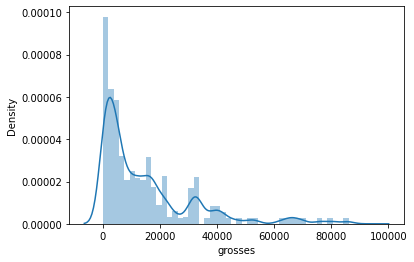

In [107]:
# Target값의 분포가 left skewed 됨을 확인
sns.distplot(train[target])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


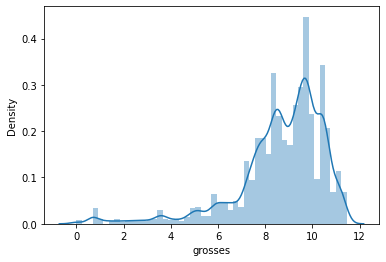

In [110]:
# log transform을 통해 skewed를 다소 해소해줌
train_log = np.log(train[target]+1)
sns.distplot(train_log)

In [177]:
# 4이하의 값은 약 천개정도로 지워주어도 무방한 이상치
train = train[train_log > 4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [131]:
train, val = train_test_split(train, train_size = 0.8, random_state=42)

X_train = train.drop(target, axis='columns')
y_train_log = np.log(train[target]+1)
X_val = val.drop(target, axis='columns')
y_val_log = np.log(val[target]+1)

X_test = test.drop(target, axis='columns')
y_test = test[target]
X_train.shape, y_train_log.shape,X_val.shape, y_val_log.shape, X_test.shape, y_test.shape

((23951, 12), (23951,), (5988, 12), (5988,), (10898, 12), (10898,))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


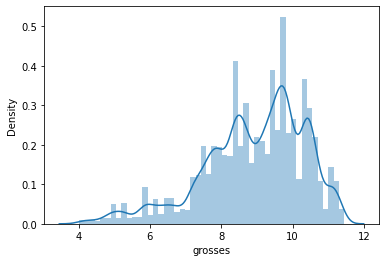

In [114]:
sns.distplot(y_train_log)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


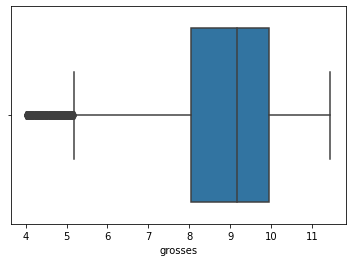

In [178]:
sns.boxplot(y_train_log)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


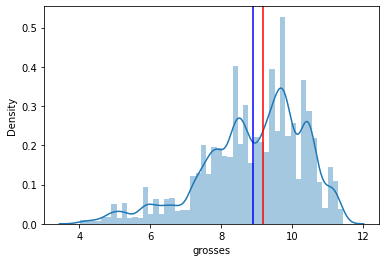

In [179]:
sns.distplot(y_train_log)
plt.axvline(y_train_log.mean(), color= 'blue')
plt.axvline(y_train_log.median(), color= 'red')

In [132]:
# 기준 모델의 선정 Grosses(log transform )한 값의 평균값
predict = y_train_log.mean()

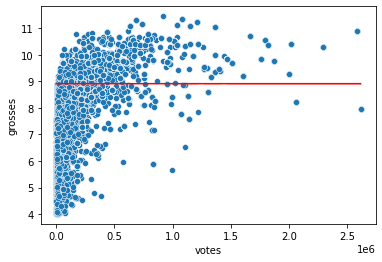

In [163]:
x = train['votes']
y = y_train_log

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x , y=y)
plt.show()

In [135]:
# 선형회귀 모델 적용

linear = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    LinearRegression()
)

linear.fit(X_train, y_train_log)
print('R2 score: ', linear.score(X_val, y_val_log))

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


R2 score:  0.7762872249954834


In [137]:
coefficients = linear.named_steps['linearregression'].coef_
pd.Series(coefficients, X_train.columns)

rank            9.011557e-06
titles          1.856326e-01
years           2.798456e-03
imdp_ratings    1.063983e-01
meta_scores    -2.312491e-03
votes           1.685514e-07
directors       2.864910e-01
movie_rates     1.394655e-01
genre1          1.325612e-01
genre2          5.373048e-03
lead_actor      2.500487e-01
actor1          2.908648e-01
dtype: float64

In [180]:
# RidgeRegressor
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0]
pipe_Ridge = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True, cv=3)
)


pipe_Ridge.fit(X_train, y_train_log)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step o

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['titles', 'directors', 'movie_rates',
                                     'genre1', 'genre2', 'lead_actor',
                                     'actor1'])),
                ('simpleimputer', SimpleImputer()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-02, 5.e-02, 1.e-01, 2.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         cv=3, normalize=True))])

In [175]:
pipe_Ridge.named_steps['ridgecv'].best_score_

0.8268811160301545

In [166]:
# XGBRegressor로 학습

pipe_XGB = make_pipeline(
    TargetEncoder(),
    SimpleImputer(),
    XGBRegressor(
    n_estimator=1000,
    objective='reg:squarederror',
    learning_rate = 0.2,
    n_jobs= -1)  
)

pipe_XGB.fit(X_train, y_train_log)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['titles', 'directors', 'movie_rates',
                                     'genre1', 'genre2', 'lead_actor',
                                     'actor1'])),
                ('simpleimputer', SimpleImputer()),
                ('xgbregressor',
                 XGBRegressor(learning_rate=0.2, n_estimator=1000, n_jobs=-1,
                              objective='reg:squarederror'))])

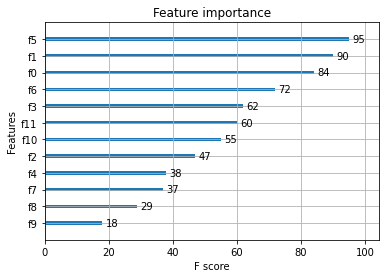

In [170]:
xgboost.plot_importance(pipe_XGB.named_steps['xgbregressor'])

In [171]:
y_pred = pipe_XGB.predict(X_val)
pipe_XGB.score(X_val, y_val_log)

0.9125073591274881

선형회귀, Ridge회귀, XGBoost회귀를 사용했을때 가장 성능이 좋은 모델은 XGBoost회귀이므로 최종모델은 XGBoost를 사용하겠습니다. 다음 단계는 하이퍼 파라미터 조정을 통해 모델의 성능을 개선시켜 보겠습니다. 크롤링 문서와 이 문서는 Colab에서 진행하였고, 다음은 RandomCV와, GridCV를 통한 하이퍼파라미터 선정을 하기 위한 환경을 위해서 jupyternotebook에서 진행하겠습니다.

In [181]:
X_train.to_csv('X_train.csv')
y_train_log.to_csv('y_train_log.csv')
X_val.to_csv('X_val.csv')
y_val_log.to_csv('y_val_log.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')